In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import os
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
# Define the path to the directory containing the folders
base_path = '../Preprocessed Dataset'

# List the folders in the directory
folders = ['IBM Plex Sans Arabic', 'Lemonada', 'Marhey', 'Scheherazade New']

# Create a dictionary to hold the labels for each folder
labels = {folder: i for i, folder in enumerate(folders)}

# Prepare a list to store the image data and labels
data = []

# Loop through each folder and each image within the folder
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpeg'):  # assuming the images are in PNG format
            image_path = os.path.join(folder_path, filename)
            # Load the image
            image = Image.open(image_path)
            # Optionally, convert the image to 'L' to ensure it's in grayscale
            if image.mode != 'L':
                image = image.convert('L')
            # Convert image data to array
            image_data = np.array(image)
            # Binarize the image data (0 or 1) directly instead of normalization to [0, 1] range
            image_data = (image_data > 127).astype(np.uint8)  # Assuming binary threshold at the middle (127)
            # Append the image data and label to the list
            data.append((image_data, labels[folder]))

# Now, 'data' contains tuples of (image_data, label) where image_data are integers (0 or 1)


In [3]:
# Assuming 'data' is the list that contains all your images and their labels
# Separate data into two lists: features and labels
data, labels = zip(*data)

# Convert these lists to numpy arrays for compatibility with sklearn
data = np.array(data)
labels = np.array(labels)

# Split the data using sklearn's train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
data = 1
labels = 1

# Check the size of the training and test sets
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 3197
Test set size: 800


In [4]:
X_train.shape

(3197, 300, 300)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert to uint8
X_train_uint8 = (X_train * 255).astype('uint8')

sift = cv2.SIFT_create(nfeatures=500,  # Maximum number of features to retain
                       contrastThreshold=0.1,  # Increase to reduce features from low-contrast areas
                       edgeThreshold=20,  # Increase to reduce features from edge-like areas
                       sigma=3.5)  # Standard deviation of the Gaussian applied to the image
descriptors_list = []

# Extract descriptors
for img in X_train_uint8:
    kp, desc = sift.detectAndCompute(img, None)
    print(f"Number of keypoints: {len(kp)}")  # Print the number of keypoints detected
    if desc is not None:
        descriptors_list.append(desc)
    else:
        print("No descriptors found.")

Number of keypoints: 202
Number of keypoints: 253
Number of keypoints: 106
Number of keypoints: 194
Number of keypoints: 146
Number of keypoints: 81
Number of keypoints: 289
Number of keypoints: 282
Number of keypoints: 470
Number of keypoints: 125
Number of keypoints: 383
Number of keypoints: 122
Number of keypoints: 197
Number of keypoints: 175
Number of keypoints: 272
Number of keypoints: 109
Number of keypoints: 291
Number of keypoints: 204
Number of keypoints: 112
Number of keypoints: 156
Number of keypoints: 64
Number of keypoints: 114
Number of keypoints: 193
Number of keypoints: 136
Number of keypoints: 115
Number of keypoints: 147
Number of keypoints: 486
Number of keypoints: 240
Number of keypoints: 296
Number of keypoints: 90
Number of keypoints: 36
Number of keypoints: 401
Number of keypoints: 174
Number of keypoints: 78
Number of keypoints: 111
Number of keypoints: 291
Number of keypoints: 41
Number of keypoints: 261
Number of keypoints: 160
Number of keypoints: 158
Number

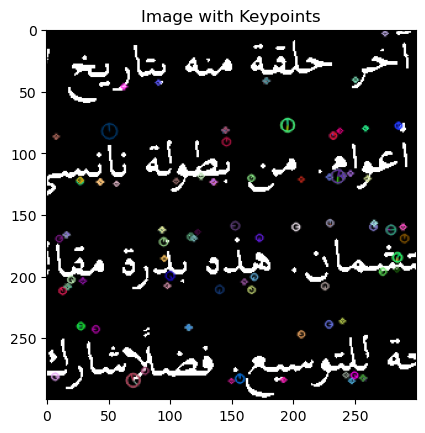

In [6]:
# Optional: Visualize an image and its keypoints
img_index = 2  # Change index to view different images
img_with_keypoints = cv2.drawKeypoints(X_train_uint8[img_index], kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_with_keypoints, cmap='gray')
plt.title("Image with Keypoints")
plt.show()

In [7]:
# Stack all descriptors into a numpy array
all_descriptors = np.vstack(descriptors_list)

In [8]:
all_descriptors.shape

(647268, 128)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming all_descriptors is your (727622, 128) array
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
all_descriptors_normalized = scaler.fit_transform(all_descriptors)

# Initialize PCA, reduce the dimensions to 20
pca = PCA(n_components=10)
reduced_descriptors = pca.fit_transform(all_descriptors_normalized)

In [16]:
reduced_descriptors.shape

(647268, 10)

In [17]:
# Cluster descriptors using k-means
k = 26*4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, verbose=1)
kmeans.fit(reduced_descriptors)

c:\Users\Abdelaal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 12747467.0.
Iteration 1, inertia 10586647.0.
Iteration 2, inertia 10240808.0.
Iteration 3, inertia 10083766.0.
Iteration 4, inertia 9992964.0.
Iteration 5, inertia 9934853.0.
Iteration 6, inertia 9895688.0.
Iteration 7, inertia 9867132.0.
Iteration 8, inertia 9845002.0.
Iteration 9, inertia 9826721.0.
Iteration 10, inertia 9809269.0.
Iteration 11, inertia 9793010.0.
Iteration 12, inertia 9779195.0.
Iteration 13, inertia 9768208.0.
Iteration 14, inertia 9759202.0.
Iteration 15, inertia 9751715.0.
Iteration 16, inertia 9745376.0.
Iteration 17, inertia 9739536.0.
Iteration 18, inertia 9733306.0.
Iteration 19, inertia 9727439.0.
Iteration 20, inertia 9722814.0.
Iteration 21, inertia 9719180.0.
Iteration 22, inertia 9716091.0.
Iteration 23, inertia 9713323.0.
Iteration 24, inertia 9710646.0.
Iteration 25, inertia 9707737.0.
Iteration 26, inertia 9704529.0.
Iteration 27, inertia 9701120.0.
Iteration 28, inertia 9697776.0.
Iteration 29, inertia 969

KMeans(n_clusters=104, random_state=42, verbose=1)

In [18]:
# Assuming 'pca' is the PCA model fitted earlier and 'kmeans' is the trained k-means model
# Assuming 'descriptors_list' is a list containing the descriptors for each image

# Create histograms for each image
feature_vectors = []
for desc in descriptors_list:
    if desc is not None and len(desc) > 0:
        # Normalize and apply the PCA transformation to the descriptors
        desc_normalized = scaler.transform(desc)  # Ensure descriptors are scaled consistently
        desc_reduced = pca.transform(desc_normalized)

        # Predict cluster assignments for the reduced descriptors using the trained k-means model
        cluster_predictions = kmeans.predict(desc_reduced)

        # Create a histogram of cluster assignments (visual words)
        hist, _ = np.histogram(cluster_predictions, bins=np.arange(k + 1), density=True)

        feature_vectors.append(hist)
    else:
        # If no descriptors were found for this image, use an empty histogram
        feature_vectors.append(np.zeros(k))

# Now `feature_vectors` contains a fixed-size feature vector for each image


In [21]:
len(feature_vectors)

3197

In [24]:
X_train = np.array(feature_vectors)

In [25]:
y_train.shape

(3197,)

In [26]:
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score

# Initialize an SVM model with a linear kernel
svm_model = svm.SVC(kernel='linear', random_state=42)

# Train (fit) the SVM model on the training data
svm_model.fit(X_train, y_train)

# Predict the training data to evaluate model performance
y_train_pred = svm_model.predict(X_train)

# Print a classification report and accuracy score to see how well the model is doing
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Classification Report on Training Data:\n", classification_report(y_train, y_train_pred))


Training Accuracy: 0.8914607444479199
Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       792
           1       0.99      0.95      0.97       790
           2       0.84      0.80      0.82       809
           3       0.84      0.87      0.85       806

    accuracy                           0.89      3197
   macro avg       0.89      0.89      0.89      3197
weighted avg       0.89      0.89      0.89      3197



In [27]:
# Convert to uint8
X_test_uint8 = (X_test * 255).astype('uint8')

sift = cv2.SIFT_create(nfeatures=500,  # Maximum number of features to retain
                       contrastThreshold=0.1,  # Increase to reduce features from low-contrast areas
                       edgeThreshold=20,  # Increase to reduce features from edge-like areas
                       sigma=3.5)  # Standard deviation of the Gaussian applied to the image
test_descriptors_list = []

# Extract descriptors
for img in X_test_uint8:
    kp, desc = sift.detectAndCompute(img, None)
    print(f"Number of keypoints: {len(kp)}")  # Print the number of keypoints detected
    if desc is not None:
        test_descriptors_list.append(desc)
    else:
        print("No descriptors found.")

Number of keypoints: 253
Number of keypoints: 156
Number of keypoints: 419
Number of keypoints: 371
Number of keypoints: 119
Number of keypoints: 129
Number of keypoints: 265
Number of keypoints: 264
Number of keypoints: 425
Number of keypoints: 106
Number of keypoints: 285
Number of keypoints: 275
Number of keypoints: 65
Number of keypoints: 96
Number of keypoints: 124
Number of keypoints: 301
Number of keypoints: 39
Number of keypoints: 500
Number of keypoints: 502
Number of keypoints: 192
Number of keypoints: 316
Number of keypoints: 63
Number of keypoints: 388
Number of keypoints: 347
Number of keypoints: 42
Number of keypoints: 171
Number of keypoints: 120
Number of keypoints: 174
Number of keypoints: 50
Number of keypoints: 218
Number of keypoints: 56
Number of keypoints: 225
Number of keypoints: 208
Number of keypoints: 200
Number of keypoints: 65
Number of keypoints: 250
Number of keypoints: 216
Number of keypoints: 217
Number of keypoints: 221
Number of keypoints: 133
Number o

In [28]:
# Stack all descriptors into a numpy array
all_test_descriptors = np.vstack(test_descriptors_list)

In [29]:
all_test_descriptors_normalized = scaler.transform(all_test_descriptors)
reduced_test_descriptors = pca.transform(all_test_descriptors_normalized)

In [30]:
# Assuming 'pca' is the PCA model fitted earlier and 'kmeans' is the trained k-means model
# Assuming 'descriptors_list' is a list containing the descriptors for each image

# Create histograms for each image
test_feature_vectors = []
for desc in test_descriptors_list:
    if desc is not None and len(desc) > 0:
        # Normalize and apply the PCA transformation to the descriptors
        desc_normalized = scaler.transform(desc)  # Ensure descriptors are scaled consistently
        desc_reduced = pca.transform(desc_normalized)

        # Predict cluster assignments for the reduced descriptors using the trained k-means model
        cluster_predictions = kmeans.predict(desc_reduced)

        # Create a histogram of cluster assignments (visual words)
        hist, _ = np.histogram(cluster_predictions, bins=np.arange(k + 1), density=True)

        test_feature_vectors.append(hist)
    else:
        # If no descriptors were found for this image, use an empty histogram
        test_feature_vectors.append(np.zeros(k))

# Now `feature_vectors` contains a fixed-size feature vector for each image


In [32]:
X_test = np.array(test_feature_vectors)

In [33]:
X_test.shape

(800, 104)

In [34]:
# Predict the training data to evaluate model performance
y_test_pred = svm_model.predict(X_test)

# Print a classification report and accuracy score to see how well the model is doing
print("Training Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report on Training Data:\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.88875
Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       208
           1       0.98      0.95      0.97       207
           2       0.80      0.83      0.81       191
           3       0.84      0.82      0.83       194

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

